## Diagnostico inicial 
#### Registro Evento desnutrición aguda en la comunidad Wayuu

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import plotly.express as px
import squarify

# import py7zr
import io
from datetime import datetime
import csv

### Análisis descriptivo géneral

In [5]:
# Ver el número de filas y columnas// 23.286 registros y 88 variables
num_rows, num_columns = df.shape
print("Número de filas:", num_rows)
print("Número de columnas:", num_columns)

Número de filas: 23286
Número de columnas: 88


In [6]:
# Verificar los nombres de las columnas
print("Nombres de las columnas del DataFrame:")
print("-----------------------------------------")
print(df.columns)

Nombres de las columnas del DataFrame:
-----------------------------------------
Index(['cod_eve', 'fec_not', 'semana', 'año', 'cod_pre', 'cod_sub', 'pri_nom_',
       'seg_nom_', 'pri_ape_', 'seg_ape_', 'tip_ide_', 'num_ide_', 'edad_',
       'uni_med_', 'nacionali_', 'nombre_nacionalidad', 'sexo_', 'iden_gener',
       'otra_ident', 'orient_sex', 'otra_orien', 'cod_pais_o', 'cod_dpto_o',
       'cod_mun_o', 'area_', 'localidad_', 'cen_pobla_', 'vereda_', 'bar_ver_',
       'dir_res_', 'ocupacion_', 'tip_ss_', 'cod_ase_', 'per_etn_',
       'nom_grupo_', 'estrato_', 'gp_discapa', 'gp_desplaz', 'gp_migrant',
       'gp_carcela', 'gp_gestan', 'sem_ges', 'gp_indigen', 'gp_pobicbf',
       'gp_mad_com', 'gp_desmovi', 'gp_psiquia', 'gp_vic_vio', 'gp_otros',
       'fuente_', 'cod_pais_r', 'cod_dpto_r', 'cod_mun_r', 'fec_con_',
       'ini_sin_', 'tip_cas_', 'pac_hos_', 'fec_hos_', 'con_fin_', 'fec_def_',
       'ajuste_', 'telefono_', 'fecha_nto_', 'cer_def_', 'cbmte_', 'uni_modif',
      

In [7]:
# Conteo de valores únicos en cada columna
print("\nConteo de valores únicos en cada columna:")
print(df.nunique())


Conteo de valores únicos en cada columna:
cod_eve           1
fec_not         365
semana           52
año               1
cod_pre        1898
              ...  
nmun_resi      1056
ndep_notif       38
nmun_notif      811
latitud       13626
longitud      13459
Length: 88, dtype: int64


In [8]:
# Verificar los tipos de datos
print(df.dtypes)

cod_eve                int64
fec_not       datetime64[ns]
semana                 int64
año                    int64
cod_pre                int64
                   ...      
nmun_resi             object
ndep_notif            object
nmun_notif            object
latitud              float64
longitud             float64
Length: 88, dtype: object


In [9]:
# Descripción estadística de las variables numéricas
df.describe()

,cod_eve,fec_not,semana,año,cod_pre,cod_sub,edad_,uni_med_,nacionali_,iden_gener,...,fecha_nto_,cer_def_,cbmte_,uni_modif,nit_upgd,fm_fuerza,fm_unidad,fm_grado,latitud,longitud
count,23286.0,23286,23286.000000,23286.0,2.328600e+04,23286.000000,23286.000000,23286.000000,23286.000000,11.000000,...,23286,0.0,0.0,9.710000e+02,2.310200e+04,35.000000,3.500000e+01,35.000000,18737.000000,18737.000000
mean,113.0,2023-06-30 04:56:20.159752448,25.943228,2023.0,3.636725e+09,9.390234,3.502061,1.328996,194.150219,1.272727,...,2021-08-11 00:29:59.536202240,NaN,NaN,3.523739e+11,1.330398e+10,3.200000,5.639808e+08,11.085714,6.412500,-74.465080
min,113.0,2023-01-01 00:00:00,1.000000,2023.0,5.001000e+08,0.000000,1.000000,1.000000,68.000000,1.000000,...,2018-01-24 00:00:00,NaN,NaN,5.001000e+10,5.027000e+04,3.000000,1.000000e+00,0.000000,-4.221610,-81.728642
25%,113.0,2023-04-11 00:00:00,14.000000,2023.0,1.100130e+09,1.000000,1.000000,1.000000,170.000000,1.000000,...,2020-08-30 00:00:00,NaN,NaN,1.100191e+11,8.000038e+09,3.000000,1.000000e+00,0.000000,4.556979,-75.569519
50%,113.0,2023-06-26 12:00:00,25.000000,2023.0,2.700195e+09,1.000000,2.000000,1.000000,170.000000,1.000000,...,2021-12-10 00:00:00,NaN,NaN,2.367200e+11,8.260023e+09,3.000000,1.000000e+00,0.000000,5.411401,-74.201733
75%,113.0,2023-09-21 00:00:00,38.000000,2023.0,5.283501e+09,7.000000,4.000000,2.000000,170.000000,1.500000,...,2022-09-08 00:00:00,NaN,NaN,5.425001e+11,8.999992e+09,3.000000,1.000000e+00,0.000000,8.956891,-73.491742
max,113.0,2023-12-31 00:00:00,52.000000,2023.0,9.977300e+09,99.000000,29.000000,3.000000,862.000000,2.000000,...,2023-12-18 00:00:00,NaN,NaN,9.900100e+11,9.900200e+11,7.000000,8.001306e+09,64.000000,12.584659,-67.480255
std,0.0,NaN,14.132735,0.0,2.648854e+09,18.779284,3.192617,0.489379,126.906952,0.467099,...,NaN,NaN,NaN,2.826938e+11,6.605218e+10,0.719477,1.504478e+09,23.321754,3.020754,1.682066


In [10]:
#Valores unicos por tipo y número de documento // total de obs de la base 23.286, es decir que no hay duplicados
unique_id_counts = df.groupby(['tip_ide_', 'num_ide_']).size().reset_index(name='count')
print(unique_id_counts.count())

tip_ide_    23286
num_ide_    23286
count       23286
dtype: int64


In [11]:
#Año de referencia de los datos: 2023
print(df['año'].describe())

count    23286.0
mean      2023.0
std          0.0
min       2023.0
25%       2023.0
50%       2023.0
75%       2023.0
max       2023.0
Name: año, dtype: float64


In [12]:
#Fecha de reporte
conteo_fec_con_ = df['fec_con_'].value_counts()
print(conteo_fec_con_)

fec_con_
2023-05-30    145
2023-06-26    131
2023-05-18    130
2023-06-09    125
2023-04-25    122
             ... 
2023-01-08     11
2023-08-20     10
2023-12-25      8
2023-12-17      7
2023-02-05      7
Name: count, Length: 364, dtype: int64


In [13]:
# Contar valores faltantes en cada columna
valores_perdidos = df.isnull().sum()
print(valores_perdidos)

cod_eve          0
fec_not          0
semana           0
año              0
cod_pre          0
              ... 
nmun_resi        0
ndep_notif       0
nmun_notif       0
latitud       4549
longitud      4549
Length: 88, dtype: int64


*Variables con datos faltantes:* 
* Segundo nombre
* Segundo apellido
* Orientación sexual
* Localidad
* Barrio
* Estrato
* Grado
* Fuerza
* Longitud 
* Latitud

### Análisis de la distribución de los datos

EDAD

In [14]:
#Revisando la variable edad

#Convirtiendo la variable a numerica
df['edad_num'] = df['edad_'].astype(int)

#Máximo y minimo de edades
edad_minimo = df['edad_num'].min()
edad_maximo = df['edad_num'].max()

print(f'Valor mínimo de edad: {edad_minimo}')
print(f'Valor máximo de edad: {edad_maximo}')

#Media de edad
edad_media = df['edad_num'].mean()
print(f'Edad promedio: {edad_media}') 

Valor mínimo de edad: 1
Valor máximo de edad: 29
Edad promedio: 3.5020613244009278


*Definición de edades por el DANE*

Niños: 1-13 años 

Jóvenes: 14-28 años

Adultos: 29-59 años 

In [15]:
#Gráfica del Porcentaje de personas por edad 
# Definir los límites de los tramos de edad
bins = [1, 13, 18, 29]  

# Etiquetas para cada rango
labels = ['1-13 años', '14-28 años', '29 años']

# Agrupar las edades en los tramos definidos
df['grupo_edad'] = pd.cut(df['edad_num'], bins=bins, labels=labels, right=False)

# Contar el número de personas en cada grupo
conteo_edades= df['grupo_edad'].value_counts
conteo_edades_per = df['grupo_edad'].value_counts(normalize=True).sort_index() * 100
#Número de personas por edad
print(f'Porcentajes: {conteo_edades_per}') 

Porcentajes: grupo_edad
1-13 años     99.398445
14-28 años     0.171873
29 años        0.429682
Name: proportion, dtype: float64


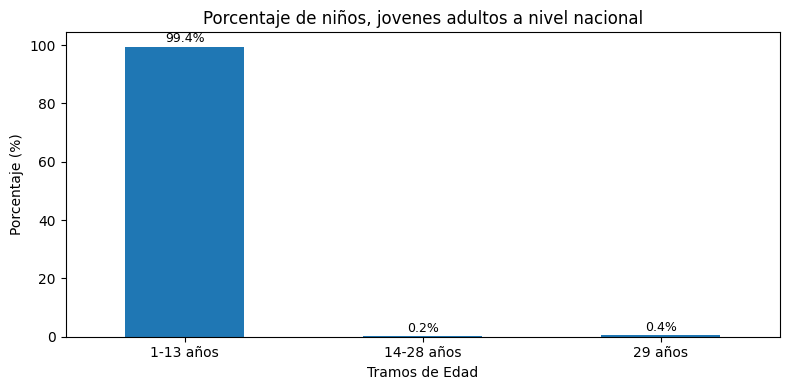

In [16]:
# Crear la gráfica de barras
plt.figure(figsize=(8, 4))
conteo_edades_per.plot(kind='bar', color='tab:blue')
plt.title('Porcentaje de niños, jovenes adultos a nivel nacional')
plt.xlabel('Tramos de Edad')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)

# Mostrar los valores en las barras
for index, value in enumerate(conteo_edades_per):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Porcentajes: edad_num
1    39.288177
2    23.964356
3    16.808996
4    16.925688
5     3.012783
Name: proportion, dtype: float64


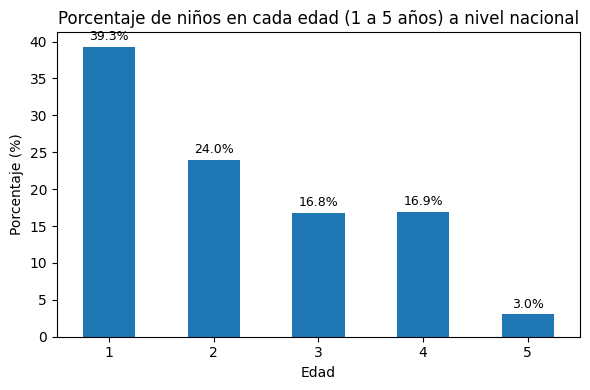

In [17]:
#Casos en en menores de 5 Años
edades_hasta5 = [1, 2, 3, 4, 5]
df_filtrado = df[df['edad_num'].isin(edades_hasta5)]

# Calcular el porcentaje de personas en cada edad
conteo_edades_5_per = df_filtrado['edad_num'].value_counts(normalize=True).sort_index() * 100

# Mostrar los porcentajes
print(f'Porcentajes: {conteo_edades_5_per}')

#Gráfica edad
plt.figure(figsize=(6, 4))
conteo_edades_5_per.plot(kind='bar')
plt.title('Porcentaje de niños en cada edad (1 a 5 años) a nivel nacional')
plt.xlabel('Edad')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)

# Mostrar los valores en las barras
for index, value in enumerate(conteo_edades_5_per):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Sexo

In [18]:
#Número de personas por género
conteo_genero = df['sexo_'].value_counts()
print(conteo_genero)

sexo_
M    12884
F    10402
Name: count, dtype: int64


Porcentajes: sexo_
M    55.329382
F    44.670618
Name: proportion, dtype: float64


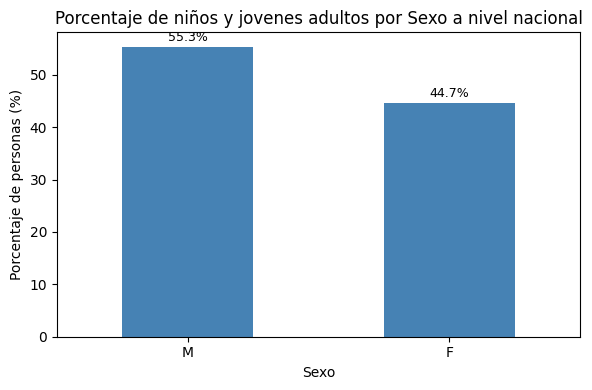

In [19]:
#Visualización porcentual
conteo_genero_per = df['sexo_'].value_counts(normalize=True) * 100
print(f'Porcentajes: {conteo_genero_per}')

# Crear la gráfica de barras
plt.figure(figsize=(6, 4))
conteo_genero_per.plot(kind='bar', color='steelblue')
plt.title('Porcentaje de niños y jovenes adultos por Sexo a nivel nacional')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de personas (%)')
plt.xticks(rotation=0)


# Mostrar los valores en las barras
for index, value in enumerate(conteo_genero_per):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Municipio

In [20]:
#DIVIPOLA
ruta_archivo = r"\\ws_ajsuarezp\COMPARTIDAS\Documentos_PILA\PILA_2020\raw\DIVIPOLA_Municipios.csv"
# Cargar el archivo CSV en un DataFrame de Pandas
try:
    df = pd.read_csv(ruta_archivo, encoding='Latin-1', dtype='str')
except pd.errors.ParserError as e:
    print(f"Error al parsear el archivo CSV: {e}")

Error al parsear el archivo CSV: Error tokenizing data. C error: Expected 3 fields in line 150, saw 5



In [21]:
#Número de personas por municipio
conteo_cod_municipio = df['cod_mun_o'].value_counts()
print(conteo_cod_municipio)

cod_mun_o
1      8860
847     836
430     739
560     465
754     432
       ... 
897       1
328       1
628       1
335       1
884       1
Name: count, Length: 562, dtype: int64


In [22]:
# Códificación municipios, verifiacación cod_num_o = nmun_resi
df['municipio_nom'] = df['cod_mun_o'].replace({ 847: 'Uribia', 430: 'Maicao', 560: 'Manaure', 1: 'Riohacha' })

In [23]:
#Convirtiendo la variable a numerica
df['municipio_noms'] = df['municipio_nom'].astype(str)
#Número de personas por municipio
conteo_municipio_nom = df['municipio_noms'].value_counts()
print(conteo_municipio_nom)

municipio_noms
Riohacha    8860
Uribia       836
Maicao       739
Manaure      465
754          432
            ... 
897            1
328            1
628            1
335            1
884            1
Name: count, Length: 562, dtype: int64


In [24]:
#Convirtiendo la variable a numerica
df['nmuns_resi'] = df['nmun_resi'].astype(str)
#Número de personas por municipio
conteo_municipio = df['nmuns_resi'].value_counts()
print(conteo_municipio)

nmuns_resi
MEDELLIN      919
URIBIA        820
RIOHACHA      778
MAICAO        541
CALI          493
             ... 
PISBA           1
GUAVATA         1
MOLAGAVITA      1
ZEA (ZEA).      1
TOLUVIEJO       1
Name: count, Length: 1056, dtype: int64


Porcentajes: nmun_resi
MEDELLIN      3.946577
URIBIA        3.521429
RIOHACHA      3.341063
MAICAO        2.323284
CALI          2.117152
                ...   
PISBA         0.004294
GUAVATA       0.004294
MOLAGAVITA    0.004294
ZEA (ZEA).    0.004294
TOLUVIEJO     0.004294
Name: proportion, Length: 1056, dtype: float64


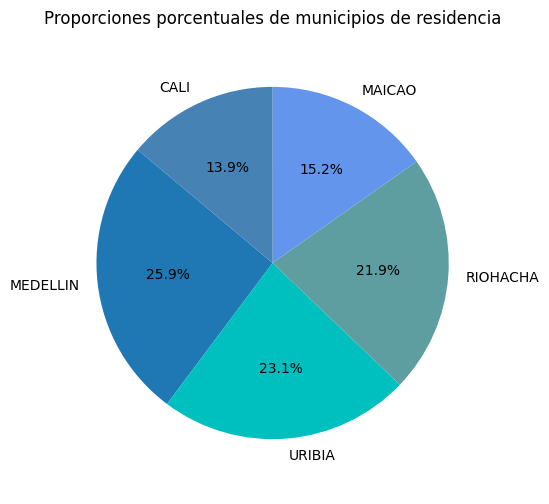

In [25]:
#Visualización porcentual
conteo_mun_per = df['nmun_resi'].value_counts(normalize=True) * 100
print(f'Porcentajes: {conteo_mun_per}')

municipios_interes = ['MEDELLIN', 'URIBIA', 'RIOHACHA', 'MAICAO', 'CALI']
conteo_mun_per = conteo_mun_per.loc[municipios_interes]

# Definir labels
labels = conteo_mun_per.index.tolist()  # Obtener los nombres de los municipios como etiquetas

# Colores para las porciones del pastel
colors = ['tab:blue', '#00BFBF', 'cadetblue', 'cornflowerblue', 'steelblue']

# Crear el gráfico de pastel
plt.figure(figsize=(5, 6))  # Tamaño del gráfico
plt.pie(conteo_mun_per, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Ajustes adicionales
plt.axis('equal')  # Para que el pastel sea un círculo en lugar de una elipse
plt.title('Proporciones porcentuales de municipios de residencia')

# Mostrar el gráfico
plt.show()


In [26]:
#Visualización porcentual
conteo_mun_nom_per = df['municipio_noms'].value_counts(normalize=True) * 100
print(f'Porcentajes: {conteo_mun_nom_per}')

Porcentajes: municipio_noms
Riohacha    38.048613
Uribia       3.590140
Maicao       3.173581
Manaure      1.996908
754          1.855192
              ...    
897          0.004294
328          0.004294
628          0.004294
335          0.004294
884          0.004294
Name: proportion, Length: 562, dtype: float64


In [27]:
#Convirtiendo la variable a numerica
df['nmuns_proce'] = df['nmun_proce'].astype(str)
#Número de personas por municipio
conteo_municipio_proce = df['nmuns_proce'].value_counts()
print(conteo_municipio_proce)


nmuns_proce
BOGOTA                                  3190
MEDELLIN                                 873
URIBIA                                   822
RIOHACHA                                 783
MAICAO                                   557
                                        ... 
LINARES                                    1
Bogotá - Ciudad Bolívar-Arborizadora       1
PARAMO                                     1
RIOFRIO                                    1
CAMPOHERMOSO                               1
Name: count, Length: 1008, dtype: int64


In [28]:
#Convirtiendo la variable a numerica
df['nmuns_notif'] = df['nmun_notif'].astype(str)
#Número de personas por municipio
conteo_municipio_notif = df['nmuns_notif'].value_counts()
print(conteo_municipio_notif)


nmuns_notif
BOGOTA        3505
RIOHACHA      1109
MEDELLIN       974
MAICAO         720
URIBIA         619
              ... 
LINARES          1
SORA             1
EL CAIRO         1
POLO NUEVO       1
YACOPI           1
Name: count, Length: 811, dtype: int64


Porcentajes: nmun_notif
BOGOTA        15.051963
RIOHACHA       4.762518
MEDELLIN       4.182771
MAICAO         3.091987
URIBIA         2.658250
                ...    
LINARES        0.004294
SORA           0.004294
EL CAIRO       0.004294
POLO NUEVO     0.004294
YACOPI         0.004294
Name: proportion, Length: 811, dtype: float64


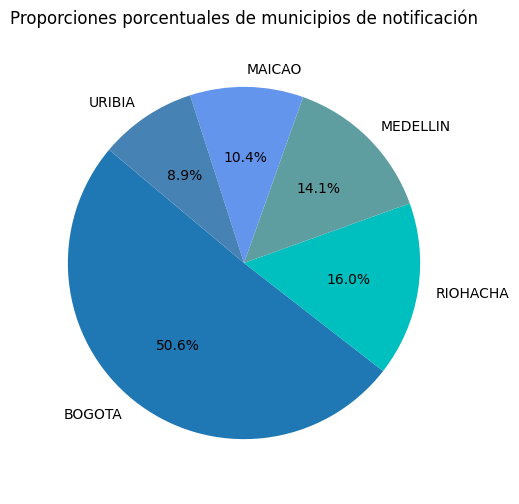

In [29]:
#Visualización porcentual
conteo_mun_notif_per = df['nmun_notif'].value_counts(normalize=True) * 100
print(f'Porcentajes: {conteo_mun_notif_per}')

municipios_interes_notif = ['BOGOTA', 'RIOHACHA', 'MEDELLIN', 'MAICAO', 'URIBIA']
conteo_mun_notif_per = conteo_mun_notif_per.loc[municipios_interes_notif]

# Definir labels
labels = conteo_mun_notif_per.index.tolist()  # Obtener los nombres de los municipios como etiquetas

# Colores para las porciones del pastel
colors = ['tab:blue', '#00BFBF', 'cadetblue', 'cornflowerblue', 'steelblue']

# Crear el gráfico de pastel
plt.figure(figsize=(5, 6))  # Tamaño del gráfico
plt.pie(conteo_mun_notif_per, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Ajustes adicionales
plt.axis('equal')  # Para que el pastel sea un círculo en lugar de una elipse
plt.title('Proporciones porcentuales de municipios de notificación')

# Mostrar el gráfico
plt.show()


In [30]:
#Número de personas por pais
conteo_cod_pais = df['nombre_nacionalidad'].value_counts()
print(conteo_cod_pais)


nombre_nacionalidad
COLOMBIA                     22458
VENEZUELA                      807
ECUADOR                         10
PERÚ                             4
ESTADOS UNIDOS DE AMÉRICA        3
BRASIL                           2
BOLIVIA                          1
CHILE                            1
Name: count, dtype: int64


### Validación Tipo de caso

In [31]:
df['tip_cas_num'] = df['tip_cas_'].astype(int)

df['tip_cas_num'].describe()

count    23286.0
mean         4.0
std          0.0
min          4.0
25%          4.0
50%          4.0
75%          4.0
max          4.0
Name: tip_cas_num, dtype: float64

In [32]:
unique_tipo_caso_counts = df.groupby(['nom_eve','tip_cas_num']).size().reset_index(name='count')
print(unique_tipo_caso_counts.count())

nom_eve        1
tip_cas_num    1
count          1
dtype: int64


In [33]:
#Número de personas por caso
nom_eve_count = df['nom_eve'].value_counts()
print(nom_eve_count)

nom_eve
DESNUTRICIÓN AGUDA EN MENORES DE 5 AÑOS    23286
Name: count, dtype: int64


#### Nombre Grupo Indigena

In [34]:
#Número de personas por pais
conteo_nom_grupo = df['nom_grupo_'].value_counts()
print(conteo_nom_grupo)

nom_grupo_
WAYUU           2156
EMBERA           421
SIKUANI          405
EMBERA KATIO     260
EMBERA CHAMI     176
                ... 
QUILLACINGA        1
MURUY              1
YURITI             1
MUINANE            1
KOFAN              1
Name: count, Length: 78, dtype: int64


#### Tipo de documento

* MS = Menor sin identificación
* PT = Protección temporal
* CN = Certificado de nacido no vivo 
* DE = ?
* PE = Permiso Especial de Permanencia
* PA = Pasaporte

tip_ide_
RC    93.721549
MS     3.654556
PT     0.961951
CN     0.699991
DE     0.558275
PE     0.395087
PA     0.008589
Name: proportion, dtype: float64


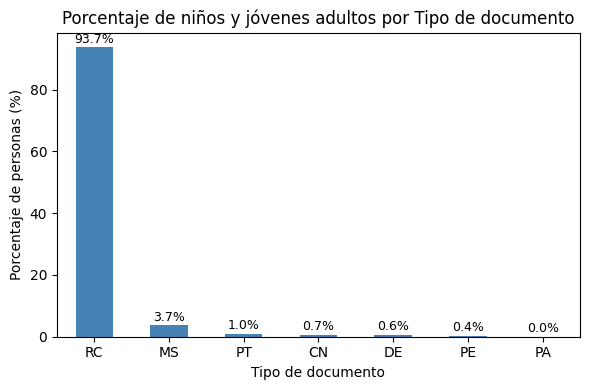

In [35]:
conteo_tipo_documento_per = df['tip_ide_'].value_counts(normalize=True) * 100
print(conteo_tipo_documento_per)
# Crear la gráfica de barras
plt.figure(figsize=(6, 4))
conteo_tipo_documento_per.plot(kind='bar', color='steelblue')
plt.title('Porcentaje de niños y jóvenes adultos por Tipo de documento')
plt.xlabel('Tipo de documento')
plt.ylabel('Porcentaje de personas (%)')
plt.xticks(rotation=0)

# Mostrar los valores en las barras
for index, value in enumerate(conteo_tipo_documento_per):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Número de documento

In [36]:
# Contar los registros donde 'numero_id' es una cadena vacía ("")
contar__id_vacio = (df['num_ide_'] == "").sum()

print(f"Número de registros con número de documento igual a cadena vacía: {contar__id_vacio }")

Número de registros con número de documento igual a cadena vacía: 0


In [37]:
#Revisar Longitud 
df['len'] = df['num_ide_'].str.len()

# Tabla de frecuencia cruzada entre 'tipo_id' y 'len'
tabla_frecuencia = pd.crosstab(df['tip_ide_'], df['len'], margins=True, margins_name='Total')

# Mostrar la tabla de frecuencia cruzada
print("\nTabla de frecuencia cruzada (''tip_ide_''vs len):")
print(tabla_frecuencia)


Tabla de frecuencia cruzada (''tip_ide_''vs len):
len        5   6   7   8    9     10   11   12  13   14  15  16  17  Total
tip_ide_                                                                  
CN         0   0   0   1   11      1    3    1   2  142   1   1   0    163
DE         1   6   8   6   11     25   40   22   6    5   0   0   0    130
MS        20  25  33  49  139    152  254  134  18   17   9   0   1    851
PA         0   0   0   0    0      0    1    1   0    0   0   0   0      2
PE         0   2   1   0    6     54   21    1   6    0   1   0   0     92
PT         0   0   0   0    2    219    3    0   0    0   0   0   0    224
RC         0   0   0   0    0  21824    0    0   0    0   0   0   0  21824
Total     21  33  42  56  169  22275  322  159  32  164  11   1   1  23286


### Estimar cuántos casos de desnutrición hay en cada municipio

#### Validación de calidad de los registros que cumplen la condición Grupo = Wayuu por municipio

Porcentajes: nmun_resi
URIBIA                                  35.946197
RIOHACHA                                21.660482
MANAURE                                 20.408163
MAICAO                                  16.326531
ALMIRANTE PADILLA (EL TORO)              2.087199
ALBANIA                                  1.345083
BARRANCAS                                0.556586
DIBULLA                                  0.371058
COLÓN (SAN CARLOS DEL ZULIA)             0.185529
VALLEDUPAR                               0.139147
AGUSTIN CODAZZI                          0.139147
HATONUEVO                                0.092764
CABIMAS (CABIMAS)                        0.092764
JESÚS ENRIQUE LOSADA (LA CONCEPCIÓN)     0.092764
CATATUMBO (ENCONTRADOS)                  0.046382
HERES (CIUDAD BOLÍVAR).                  0.046382
BOSCONIA                                 0.046382
VILLANUEVA                               0.046382
CHAGUANI                                 0.046382
ATURES (PUERTO AYACUCHO)   

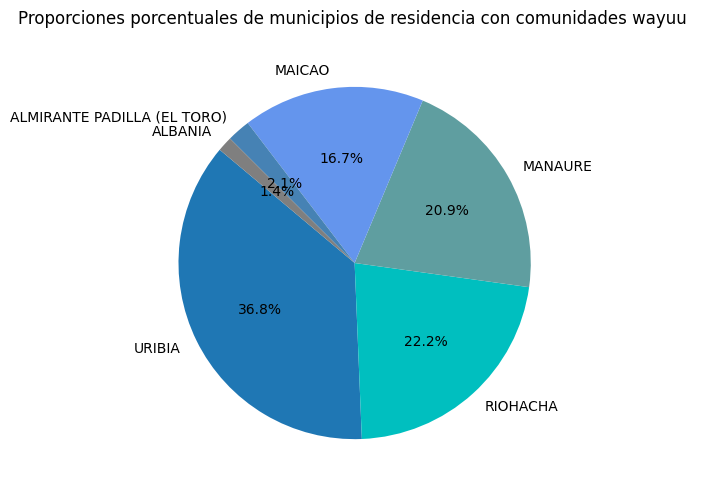

In [39]:
#Visualización porcentual
conteo_mun_Wayu_per = caso_4_wayuu_['nmun_resi'].value_counts(normalize=True) * 100
print(f'Porcentajes: {conteo_mun_Wayu_per}')

municipios_interes = ['URIBIA', 'RIOHACHA', 'MANAURE', 'MAICAO', 'ALMIRANTE PADILLA (EL TORO)', 'ALBANIA']
conteo_mun_Wayu_per = conteo_mun_Wayu_per.loc[municipios_interes]

# Definir labels
labels = conteo_mun_Wayu_per.index.tolist()  # Obtener los nombres de los municipios como etiquetas

# Colores para las porciones del pastel
colors = ['tab:blue', '#00BFBF', 'cadetblue', 'cornflowerblue', 'steelblue', 'tab:gray']

# Crear el gráfico de pastel
plt.figure(figsize=(5, 6))  # Tamaño del gráfico
plt.pie(conteo_mun_Wayu_per, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Ajustes adicionales
plt.axis('equal')  # Para que el pastel sea un círculo en lugar de una elipse
plt.title('Proporciones porcentuales de municipios de residencia con comunidades wayuu ')

# Mostrar el gráfico
plt.show()


####  Validación comunidad Wayuu de municipios de interés por edades

In [42]:
# Contar el número de personas en cada grupo
conteo_edades_wayuu= caso_4_wayuu_filtrado['edad_'].value_counts
print(conteo_edades_wayuu)

<bound method IndexOpsMixin.value_counts of 0         5
1         1
2        10
14        1
21        1
         ..
23168    16
23202     2
23203     1
23228     1
23285     2
Name: edad_, Length: 2034, dtype: int64>


Porcentajes: grupo_edad
1-13 años     99.606493
14-28 años     0.098377
29 años        0.295130
Name: proportion, dtype: float64


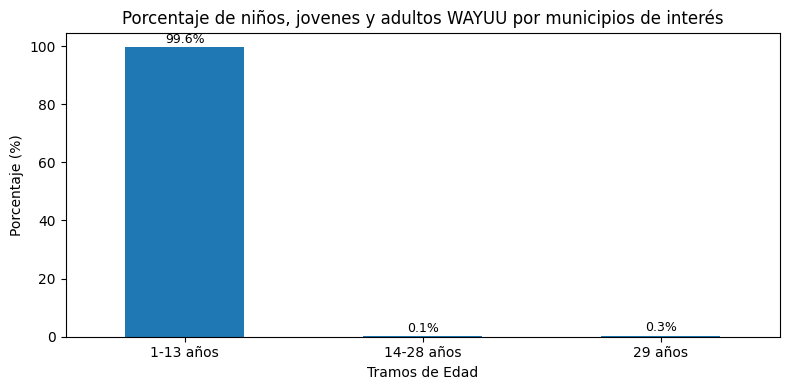

In [43]:
# Contar el número de personas en cada grupo
conteo_edades_wayuu= caso_4_wayuu_filtrado['grupo_edad'].value_counts
conteo_edades_wayuu_per = caso_4_wayuu_filtrado['grupo_edad'].value_counts(normalize=True).sort_index() * 100

#Número de personas por edad
print(f'Porcentajes: {conteo_edades_wayuu_per}') 
plt.figure(figsize=(8, 4))
conteo_edades_wayuu_per.plot(kind='bar', color='tab:blue')
plt.title('Porcentaje de niños, jovenes y adultos WAYUU por municipios de interés')
plt.xlabel('Tramos de Edad')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)

# Mostrar los valores en las barras
for index, value in enumerate(conteo_edades_wayuu_per):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [45]:
# Contar el número de personas menores de 5 años con tipo de caso igual a 4 y 'nom_grupo_' igual a 'WAYUU' por municipio
caso_4_wayuu_menores_5_por_municipio = caso_4_wayuu_menores_5['nmun_resi'].value_counts()
# Mostrar los resultados
print(caso_4_wayuu_menores_5_por_municipio)

nmun_resi
URIBIA      636
RIOHACHA    391
MANAURE     378
MAICAO      291
Name: count, dtype: int64


nmun_resi
URIBIA      37.500000
RIOHACHA    23.054245
MANAURE     22.287736
MAICAO      17.158019
Name: proportion, dtype: float64


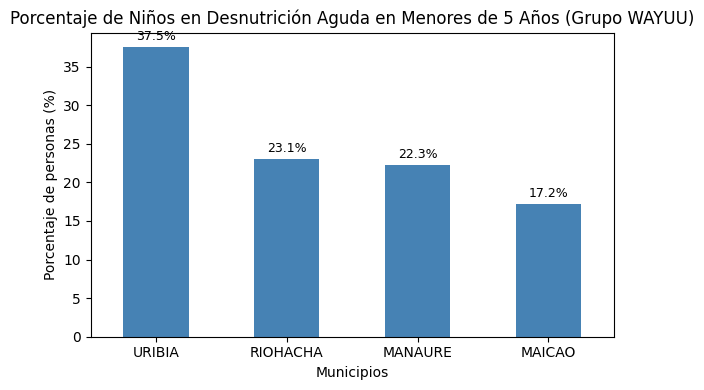

In [46]:
conteo_caso_4_wayuu_por_municipio_per = caso_4_wayuu_menores_5['nmun_resi'].value_counts(normalize=True) * 100

# Mostrar los porcentajes
print(conteo_caso_4_wayuu_por_municipio_per)

# Crear la gráfica de barras
plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura según sea necesario
conteo_caso_4_wayuu_por_municipio_per.plot(kind='bar', color='steelblue')
plt.title('Porcentaje de Niños en Desnutrición Aguda en Menores de 5 Años (Grupo WAYUU)')
plt.xlabel('Municipios')
plt.ylabel('Porcentaje de personas (%)')
plt.xticks(rotation=0)

# Mostrar los valores en las barras
for index, value in enumerate(conteo_caso_4_wayuu_por_municipio_per):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Porcentajes: sexo_
M    57.900943
F    42.099057
Name: proportion, dtype: float64


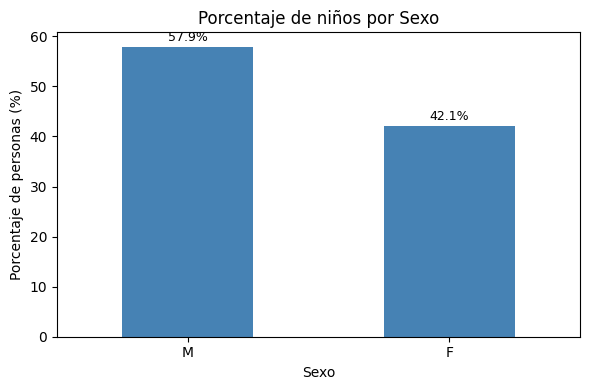

In [47]:
conteo_genero_wayuu_per = caso_4_wayuu_menores_5['sexo_'].value_counts(normalize=True) * 100
print(f'Porcentajes: {conteo_genero_wayuu_per}')

# Crear la gráfica de barras
plt.figure(figsize=(6, 4))
conteo_genero_wayuu_per.plot(kind='bar', color='steelblue')
plt.title('Porcentaje de niños por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de personas (%)')
plt.xticks(rotation=0)

# Mostrar los valores en las barras
for index, value in enumerate(conteo_genero_wayuu_per):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Porcentajes: edad_num
1    56.839623
2    20.636792
3    10.495283
4    10.318396
5     1.709906
Name: proportion, dtype: float64


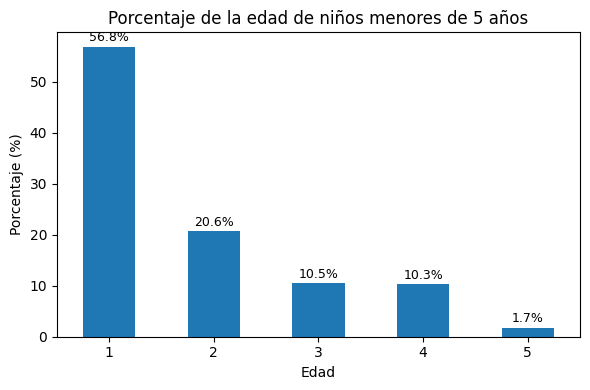

In [48]:
edades_hasta5_wayuu = [1, 2, 3, 4, 5]
df_filtrado = caso_4_wayuu_menores_5[caso_4_wayuu_menores_5['edad_num'].isin(edades_hasta5_wayuu)]

# Calcular el porcentaje de personas en cada edad
conteo_edades_5_wayuu_per = df_filtrado['edad_num'].value_counts(normalize=True).sort_index() * 100

# Mostrar los porcentajes
print(f'Porcentajes: {conteo_edades_5_wayuu_per}')

#Gráfica edad
plt.figure(figsize=(6, 4))
conteo_edades_5_wayuu_per.plot(kind='bar')
plt.title('Porcentaje de la edad de niños menores de 5 años')
plt.xlabel('Edad')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)

# Mostrar los valores en las barras
for index, value in enumerate(conteo_edades_5_wayuu_per):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Anonimización

In [49]:
import hashlib

In [ ]:
def anonimizar_con_sha256(texto):
    # Aplicar SHA-256
    hash_object = hashlib.sha256(texto.encode())
    hashed_text = hash_object.hexdigest()
    return hashed_text

def anonimizar(df):
    # Anonimizar nombres y apellidos usando SHA-256
    df['Nombre'] = df.apply(lambda row: anonimizar_con_sha256(row['pri_nom_'] + row['pri_ape_']), axis=1)

    # Anonimizar números de documento usando SHA-256
    df['ID_PERSONA'] = df.apply(lambda row: anonimizar_con_sha256(row['tip_ide_'] + row['num_ide_']), axis=1)

    return df

# Ejemplo de aplicación
df_casos_desnutrición_completo = anonimizar(df.copy())

print("\nDatos anonimizados con SHA-256:")
print(df_casos_desnutrición_completo)

In [ ]:
def anonimizar_con_sha256(texto):
    # Aplicar SHA-256
    hash_object = hashlib.sha256(texto.encode())
    hashed_text = hash_object.hexdigest()
    return hashed_text

def anonimizar(caso_4_wayuu_menores_5):
    # Anonimizar nombres y apellidos usando SHA-256
    caso_4_wayuu_menores_5['Nombre'] = caso_4_wayuu_menores_5.apply(lambda row: anonimizar_con_sha256(row['pri_nom_'] + row['pri_ape_']), axis=1)

    # Anonimizar números de documento usando SHA-256
    caso_4_wayuu_menores_5['ID_PERSONA'] = caso_4_wayuu_menores_5.apply(lambda row: anonimizar_con_sha256(row['tip_ide_'] + row['num_ide_']), axis=1)

    return caso_4_wayuu_menores_5

# Ejemplo de aplicación
df_anon_caso_4_wayuu_menores_5 = anonimizar(caso_4_wayuu_menores_5.copy())

print("\nDatos anonimizados con SHA-256:")
print(df_anon_caso_4_wayuu_menores_5)

#### Chequeo de calidad anonimización

In [52]:
#Valores unicos por tipo y número de documento // total de obs de la base 23.286, cada persona quedo con un id y nombre único
unique_id_anon_counts = df_casos_desnutrición_completo.groupby(['Nombre', 'ID_PERSONA']).size().reset_index(name='count')
print(unique_id_anon_counts.count())

Nombre        23286
ID_PERSONA    23286
count         23286
dtype: int64


In [53]:
#Valores unicos por tipo y número de documento // total de obs de la base 23.286, cada persona quedo con un id y nombre único
unique_id_anon_counts = df_anon_caso_4_wayuu_menores_5.groupby(['Nombre', 'ID_PERSONA']).size().reset_index(name='count')
print(unique_id_anon_counts.count())

Nombre        1696
ID_PERSONA    1696
count         1696
dtype: int64


### Exportar archivo final

In [54]:
# Dejar variables de interés
casos_desnutricion_wayuu_completo = df_casos_desnutrición_completo[['año', 'fec_not', 'ID_PERSONA', 'sexo_', 'edad_', 'tip_cas_', 'nom_eve', 'nom_grupo_', 'nombre_nacionalidad','ndep_resi','nmun_resi', 'latitud', 'longitud', 'nacionali_', 'nombre_nacionalidad', 'sexo_', 'iden_gener',
       'otra_ident', 'orient_sex', 'otra_orien', 'cod_pais_o', 'cod_dpto_o',
       'cod_mun_o', 'area_', 'localidad_', 'cen_pobla_', 'vereda_', 'bar_ver_',
       'dir_res_', 'ocupacion_', 'tip_ss_', 'cod_ase_', 'per_etn_',
       'nom_grupo_', 'estrato_', 'gp_discapa', 'gp_desplaz', 'gp_migrant',
       'gp_carcela', 'gp_gestan', 'sem_ges', 'gp_indigen', 'gp_pobicbf',
       'gp_mad_com', 'gp_desmovi', 'gp_psiquia', 'gp_vic_vio', 'gp_otros',
       'fuente_', 'cod_pais_r', 'cod_dpto_r', 'cod_mun_r', 'fec_con_',
       'ini_sin_', 'tip_cas_', 'pac_hos_', 'fec_hos_', 'con_fin_', 'fec_def_',
       'ajuste_', 'telefono_', 'fecha_nto_', 'cer_def_', 'cbmte_', 'uni_modif',
       'nuni_modif', 'fec_arc_xl', 'nom_dil_f_', 'tel_dil_f_', 'fec_aju_',
       'nit_upgd', 'fm_fuerza', 'fm_unidad', 'fm_grado', 'version', 'nom_eve',
       'nom_upgd', 'npais_proce', 'ndep_proce', 'nmun_proce', 'npais_resi',
       'ndep_resi', 'nmun_resi', 'ndep_notif', 'nmun_notif', 'latitud',
       'longitud']]

# Especifica la ruta y nombre del archivo CSV donde deseas exportar los datos
ruta_exportacion = 'casos_desnutricion_wayuu_completo.csv'

# Exportar el DataFrame a un archivo CSV
casos_desnutricion_wayuu_completo.to_csv(ruta_exportacion, index=False)

print(f"Exportación exitosa. Archivo guardado en: {ruta_exportacion}")

Exportación exitosa. Archivo guardado en: casos_desnutricion_wayuu_completo.csv


In [55]:
# Dejar variables de interés
casos_desnutricion_wayuu_menores_5_anon = df_anon_caso_4_wayuu_menores_5[['año', 'fec_not', 'ID_PERSONA', 'sexo_', 'edad_', 'tip_cas_', 'nom_eve', 'nom_grupo_', 'nombre_nacionalidad','ndep_resi','nmun_resi', 'latitud', 'longitud']]

# Especifica la ruta y nombre del archivo CSV donde deseas exportar los datos
ruta_exportacion = 'casos_desnutricion_wayuu_menores_5_anon.csv'

# Exportar el DataFrame a un archivo CSV
casos_desnutricion_wayuu_menores_5_anon.to_csv(ruta_exportacion, index=False)

print(f"Exportación exitosa. Archivo guardado en: {ruta_exportacion}")

Exportación exitosa. Archivo guardado en: casos_desnutricion_wayuu_menores_5_anon.csv


In [56]:
#Casos por municipio
ruta_exportacion = 'caso_4_wayuu_menores_5_por_municipio.csv'
# Exportar el DataFrame a un archivo CSV
caso_4_wayuu_menores_5_por_municipio.to_csv(ruta_exportacion, index=False)

print(f"Exportación exitosa. Archivo guardado en: {ruta_exportacion}")


Exportación exitosa. Archivo guardado en: caso_4_wayuu_menores_5_por_municipio.csv


### Exportación Agregados Población Wayuu por sexo, edad y municipio

In [57]:
# Agrupar por municipio, sexo y edad y contar el número de casos en cada grupo
agregados = caso_4_wayuu_filtrado.groupby(['nmun_resi','nom_eve', 'sexo_', 'edad_', 'nom_grupo_']).size().reset_index(name='conteo')

# Contar el número de casos por municipio de ocurrencia
conteo_casos_wayuu_mun = caso_4_wayuu_filtrado['nmun_resi'].value_counts().reset_index()
conteo_casos_wayuu_mun.columns = ['Municipio_ocurrencia', 'conteo']

# Exportar a un archivo Excel usando xlsxwriter
archivo_salida = 'Casos_desnutricion_Wayuu.xlsx'

with pd.ExcelWriter(archivo_salida, engine='xlsxwriter') as writer:
    # Exportar el DataFrame agregados a la hoja 'Conteo por Municipio, Sexo y Edad'
    agregados.to_excel(writer, sheet_name='Conteo_Mun_Sexo_Edad', index=False)
    
    # Exportar el conteo de casos por municipio de ocurrencia a la hoja 'Conteo por Municipio'
    conteo_casos_wayuu_mun.to_excel(writer, sheet_name='Conteo por Municipio', index=False)

print(f'Archivo exportado a {archivo_salida}')

Archivo exportado a Casos_desnutricion_Wayuu.xlsx


### Exportación Agregados por sexo, edad y municipio

In [58]:
# Agrupar por municipio, sexo y edad y contar el número de casos en cada grupo
agregados = df.groupby(['nmun_resi','nom_eve', 'sexo_', 'edad_', 'nom_grupo_']).size().reset_index(name='conteo')

# Municipios de interés
municipios_interes = ['URIBIA', 'MAICAO', 'MANAURE', 'RIOHACHA']

# Filtrar los datos para los municipios de interés
casos_filtrado = df[df['nmun_resi'].isin(municipios_interes)]

# Agrupar por municipio, nombre del evento, sexo, edad y grupo, y contar el número de casos en cada grupo
agregados = casos_filtrado.groupby(['nmun_resi','nom_eve', 'sexo_', 'edad_', 'nom_grupo_']).size().reset_index(name='conteo')

# Contar el número de casos por municipio de ocurrencia
conteo_casos_wayuu_mun = casos_filtrado['nmun_resi'].value_counts().reset_index()
conteo_casos_wayuu_mun.columns = ['nmun_resi', 'conteo']

# Exportar a un archivo Excel con múltiples hojas
archivo_salida = 'Casos_desnutricion_mun.xlsx'

with pd.ExcelWriter(archivo_salida, engine='xlsxwriter') as writer:
    # Exportar el DataFrame agregados a la hoja 'Conteo_Mun_Sexo_Edad'
    agregados.to_excel(writer, sheet_name='Conteo_Mun_Sexo_Edad', index=False)
    
    # Exportar el conteo de casos por municipio de ocurrencia a la hoja 'Conteo_Mun'
    conteo_casos_wayuu_mun.to_excel(writer, sheet_name='Conteo_Mun', index=False)

print(f'Archivo exportado a {archivo_salida}')

Archivo exportado a Casos_desnutricion_mun.xlsx
